In [ ]:
import icepyx as ipx

In [ ]:
poly= [
      {
        "lon": 152.75574911647576,
        "lat": -81.21829026763271
      },
      {
        "lon": 157.3571761682183,
        "lat": -80.71048087173712
      },
      {
        "lon": 158.02766982432937,
        "lat": -80.55426349923613
      },
      {
        "lon": 157.09423747954733,
        "lat": -80.39105506808406
      },
      {
        "lon": 151.36217406651946,
        "lat": -80.92240258329097
      },
      {
        "lon": 152.75574911647576,
        "lat": -81.21829026763271
      }
    ]

In [ ]:
# Extract lon and lat from the poly list
lons = [point["lon"] for point in poly]
lats = [point["lat"] for point in poly]


In [ ]:
# icepyx expects bounding box or polygon as (lon, lat) pairs
region = ipx.Query(
    'ATL06',
    [(lon, lat) for lon, lat in zip(lons, lats)],
    ['2019-12-02', '2020-01-30'],
)

# Download all available data for the region
region.avail_granules()
region.order_granules()

In [ ]:
order = region.order_granules(subset=True)

In [ ]:
file = order.download_granules("data/")

In [60]:
reader.variables.append(beam_list=['gt1l', 'gt3r'], var_list=['h_li', "latitude", "longitude"])

In [61]:
ds = reader.load()

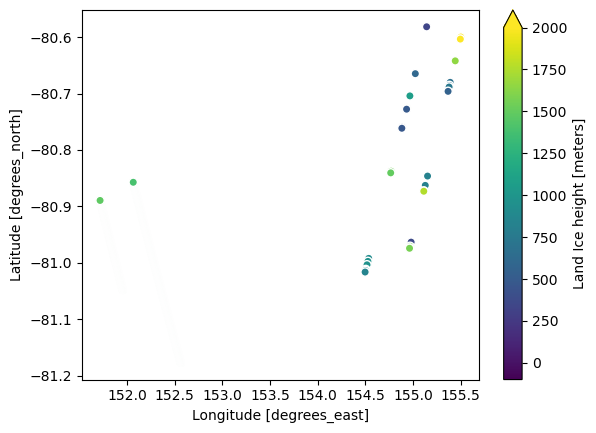

In [62]:
ds.plot.scatter(x="longitude", y="latitude", hue="h_li", vmin=-100, vmax=2000)

In [5]:
import os
import h5py
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from matplotlib import pyplot as plt
data_folder = "data/"
gdf_list = []

for filename in os.listdir(data_folder):
    if filename.endswith(".h5"):
        filepath = os.path.join(data_folder, filename)
        with h5py.File(filepath, "r") as f:
            # Example for ATL06 structure, adjust as needed
            for beam in [k for k in f.keys() if k.startswith("gt")]:
                try:
                    lat = f[f"{beam}/land_ice_segments/latitude"][:]
                    lon = f[f"{beam}/land_ice_segments/longitude"][:]
                    h_li = f[f"{beam}/land_ice_segments/h_li"][:]
                    df = gpd.GeoDataFrame({
                        "h_li": h_li,
                        "beam": beam
                    }, geometry=[Point(xy) for xy in zip(lon, lat)], crs="EPSG:4326")
                    gdf_list.append(df)
                except Exception:
                    continue

if gdf_list:
    all_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs="EPSG:4326")
    all_gdf.to_parquet("data/all_segments.parquet")

/tmp/ipykernel_37145/3058036565.py:30: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  all_gdf.to_parquet("data/all_segments.parquet")
